# BreastDCEDL Data load and Visualize

In [1]:
from sklearn.metrics import classification_report,auc,roc_auc_score
from PIL import Image
import time
from pathlib import Path


import os
import numpy as np
import pandas as pd
from PIL import Image


import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from glob import glob
#from skimage import io
from sklearn.utils import shuffle

#from nipype.interfaces.ants import N4BiasFieldCorrection
import sys
import os
import ast

import warnings
warnings.filterwarnings('ignore')

In [14]:
my_colab=False
my_computer=True
my_clone_git = True
base_path="G:\\My Drive\\breast_mri"

In [15]:
# Check if running in Google Colab

if 'google.colab' in str(get_ipython()):
    print("Running in Google Colab")
    # Clone the repository
    !git clone https://github.com/naomifridman/BreastDCEDL.git
    !pip install pydicom

    # Change to the repository directory
    os.chdir('/content/BreastDCEDL')
    
    my_colab=True
    my_clone_git = True
    my_computer=False
    base_path='/content/BreastDCEDL'

In [16]:
# use if data nifti data is downloaded
if my_computer:
    nifti_path= {'spy2':os.path.join(base_path,"SPY2","vis1","dce_cropped"),
                        'spy1':os.path.join(base_path,"SPY1","vis1","dce"),
                        'duke':os.path.join(base_path,"DUKE","dce")}

    mask_path={'spy2':os.path.join(base_path,"SPY2","vis1","mask"),
                    'spy1':os.path.join(base_path,"SPY1","vis1","mask"),
                    'duke':os.path.join(base_path,"DUKE","mask")}

# use for data_samples
if my_clone_git:
    nifti_path= {'spy2':os.path.join('.',"ISPY2","data_samples","dce"),
                        'spy1':os.path.join('.',"ISPY1","data_samples","dce"),
                        'duke':os.path.join('.',"DUKE","data_samples","dce")}

    mask_path={'spy2':os.path.join('.',"ISPY2","data_samples","mask"),
                    'spy1':os.path.join('.',"ISPY1","data_samples","mask"),
                    'duke':os.path.join('.',"DUKE","data_samples","mask")}

if my_colab:
    nifti_path= {'spy2':os.path.join(base_path,"SPY2","data_samples","dce"),
                        'spy1':os.path.join(base_path,"SPY1","data_samples","dce"),
                        'duke':os.path.join(base_path,"DUKE","data_samples","dce")}

    mask_path={'spy2':os.path.join(base_path,"SPY2","data_samples","mask"),
                    'spy1':os.path.join(base_path,"SPY1","data_samples","mask"),
                    'duke':os.path.join(base_path,"DUKE","data_samples")}

## Load and view metada

In [17]:
df=pd.read_csv('BreastDCEDL_metadata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pid             2085 non-null   object 
 1   pCR             1448 non-null   float64
 2   n_xy            2085 non-null   float64
 3   n_z             2085 non-null   float64
 4   n_times         2085 non-null   float64
 5   pre             2085 non-null   float64
 6   post_early      2085 non-null   float64
 7   post_late       2085 non-null   float64
 8   slice_thick     2085 non-null   float64
 9   xy_spacing      2083 non-null   float64
 10  mask_start      2085 non-null   float64
 11  mask_end        2085 non-null   float64
 12  sraw            2070 non-null   float64
 13  eraw            2070 non-null   float64
 14  scol            2070 non-null   float64
 15  ecol            2070 non-null   float64
 16  tum_vol         2062 non-null   float64
 17  age             2085 non-null   f

In [18]:
df.test.value_counts(dropna=False)

test
0.0    1540
1.0     271
2.0     269
NaN       5
Name: count, dtype: int64

In [19]:
pd.crosstab(df.test,df.pCR, dropna=False)

pCR,0.0,1.0,NaN
test,,,
0.0,770,324,446
1.0,122,53,96
2.0,121,53,95
NaN,5,0,0


In [20]:
pd.crosstab(df.test,df.HR, dropna=False)

HR,0.0,1.0,NaN
test,,,
0.0,545,993,2
1.0,98,173,0
2.0,101,168,0
NaN,1,4,0


In [21]:
pd.crosstab(df.test,df.HER2, dropna=False)

HER2,0.0,1.0,NaN
test,,,
0.0,1189,348,3
1.0,213,56,2
2.0,211,58,0
NaN,4,1,0


# View data examples
## setup path's to DCE and mask data
Add you correct path's to the dictionary in: data_utils.py

In [23]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('..',  'utils')))

import data_utils as ds

ds.setup_paths(base_path, nifti_path, mask_path)

SyntaxError: unmatched ')' (data_utils.py, line 239)

### Check path's

In [ ]:
ds.nifti_path

In [ ]:
os.listdir(ds.nifti_path['spy2'])

In [ ]:
os.listdir(ds.mask_path['spy2'])

## I-SPY-2 example

In [ ]:
df[df.pid.isin(['ACRIN-6698-102212','ISPY2-388581'])]

In [ ]:
if my_colab or my_clone_git:
    pid='ACRIN-6698-102212'
    d=ds.get_ser_acquisitions(pid, [0,2,6])

    ds.show_n_images([d[0][k] for k in [20,30,40]])

    ds.show_pid(pid, ser=[0,2,6])
else:  
    
    pid='ACRIN-6698-102212'
    d=ds.get_ser_acquisitions(pid, [0,2,6])

    ds.show_n_images([d[0][k] for k in [20,30,40]])

    ds.show_pid(pid, ser=[0,2,6])
    
    pid='ISPY2-388581'
    d=ds.get_ser_acquisitions(pid, ser=[0,2,4])

    ds.show_n_images([d[0][k] for k in [20,30,40]])

    ds.show_pid(pid, ser=[0,2,4])

In [11]:
if my_computer:
    pid='ACRIN-6698-172366'
    d=ds.get_ser_acquisitions(pid, [0,2,5])

    m=ds.get_nifti_mask(pid)
    m.shape

    ds.show_n_images([d[0][k] for k in [20,23,26]],axis_off=True)
    ds.show_n_images([d[1][k] for k in [20,23,26]],axis_off=True)
    ds.show_n_images([d[2][k] for k in [20,23,26]],axis_off=True)
    ds.show_n_images([m[k] for k in [20,23,26]],axis_off=True)

    ds.show_n_images([ds.to_rgb(d[0][k],
                                d[1][k],d[2][k]) for k in [20,23,26]],axis_off=True)
    ds.show_n_images([ds.to_rgb(d[0][k],
                                d[1][k],m[k]) for k in [20,23,26]],axis_off=True)

    ds.show_n_images([ds.to_rgb(d[0][k],
                                d[1][k],d[2][k]) for k in [20,23,26]])

    ds.show_pid('ACRIN-6698-172366')

### I-SPY-1 example

In [12]:
pid='ISPY1_1072'
df[df.pid==pid]

,pid,pCR,n_xy,n_z,n_times,pre,post_early,post_late,slice_thick,xy_spacing,...,race_white,race_black,HR,HER2,HR_HER2_STATUS,TripleNeg,HER2pos,HRposHER2neg,dataset,test
1318,ISPY1_1072,0.0,256.0,64.0,3.0,0.0,1.0,2.0,2.0625,0.78125,...,1.0,0.0,0.0,0.0,TripleNeg,1.0,0.0,0.0,spy1,0.0


In [13]:
ds.show_pid(pid)

NameError: name 'ds' is not defined

### DUKE example

Breast_MRI_001 duke
no nifti files
==== No mask showing BoundingBox


<Figure size 640x480 with 0 Axes>

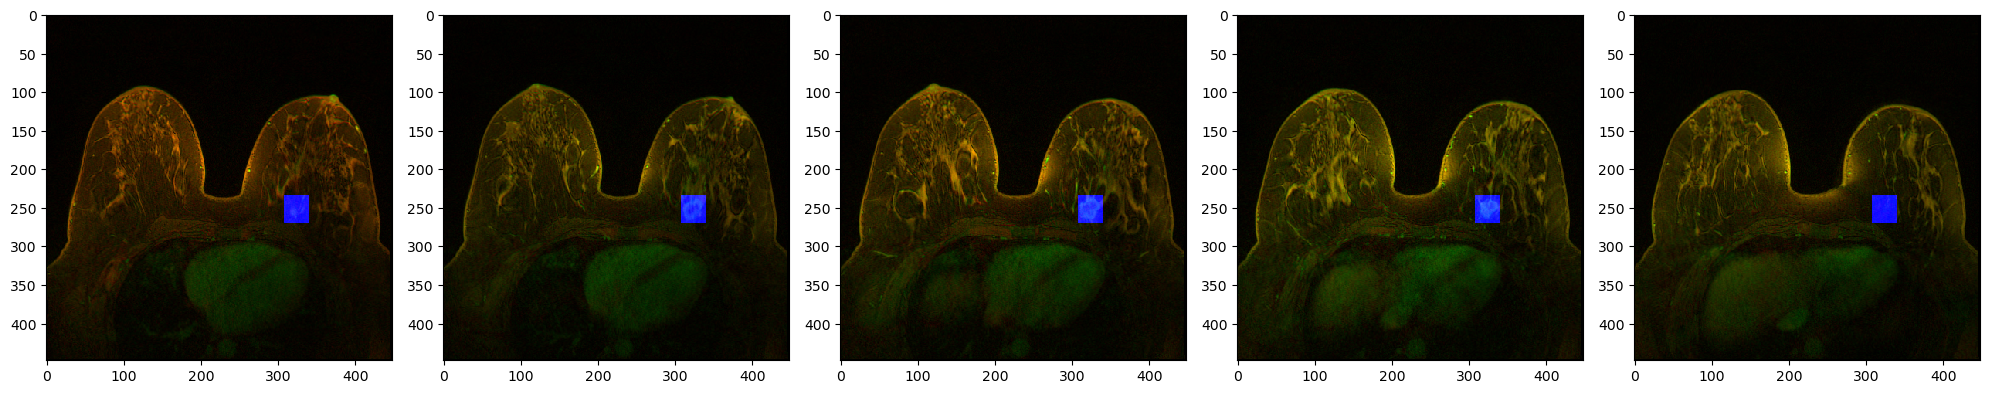

<Figure size 640x480 with 0 Axes>

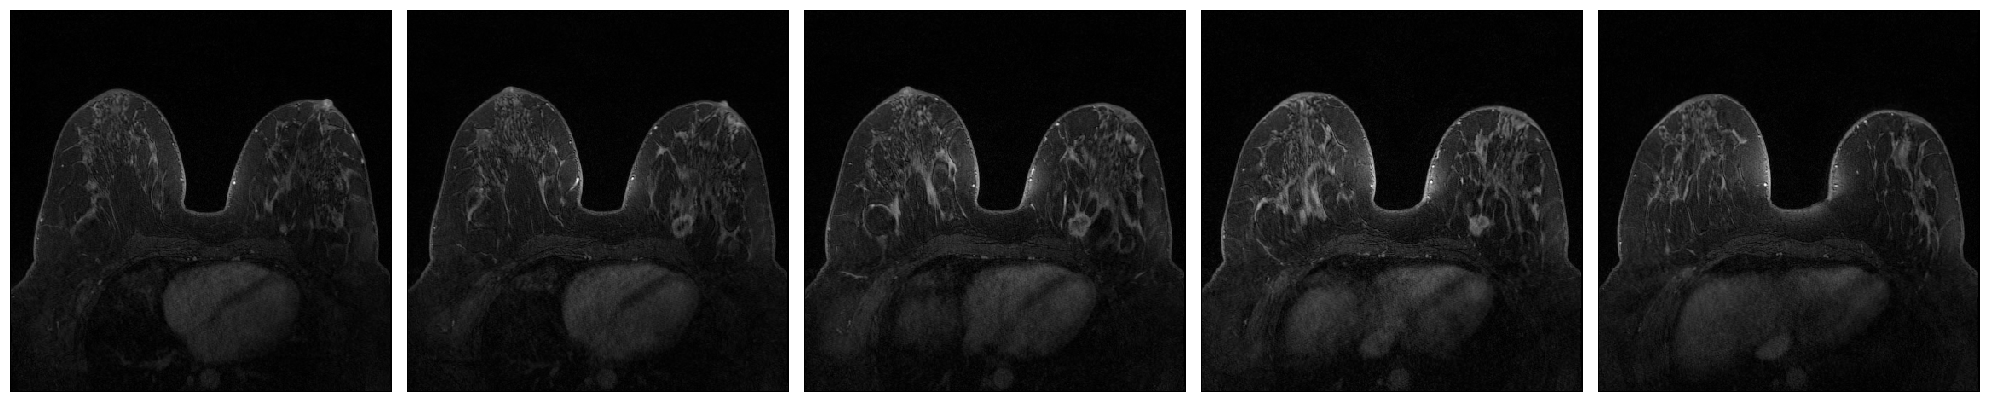

In [21]:
pid='Breast_MRI_001'
bbox=df[df.pid==pid][['mask_start', 'mask_end',
       'sraw', 'eraw', 'scol', 'ecol']].values[0]
ds.show_pid('Breast_MRI_001', bbox=bbox)

In [22]:
if my_computer:
    pid='Breast_MRI_155'
    bbox=df[df.pid==pid][['mask_start', 'mask_end',
           'sraw', 'eraw', 'scol', 'ecol']].values[0]
    bbox

    pid='Breast_MRI_155'
    d=ds.get_ser_acquisitions(pid, [0,1,2])

    ds.show_pid('Breast_MRI_155', bbox=bbox)

    pid='Breast_MRI_652'
    bbox=df[df.pid==pid][['mask_start', 'mask_end',
           'sraw', 'eraw', 'scol', 'ecol']].values[0]
    d=ds.get_ser_acquisitions(pid, [0,1,2])

    ds.show_pid(pid, bbox=bbox)

    pid='Breast_MRI_597'
    bbox=df[df.pid==pid][['mask_start', 'mask_end',
           'sraw', 'eraw', 'scol', 'ecol']].values[0]
    d=ds.get_ser_acquisitions(pid, [0,1,2])

    ds.show_pid(pid, bbox=bbox)